# Data Analysis and Exploration

In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect 
from sqlalchemy import func, distinct

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Create the connection engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Show all of the classes mapped to the Base
Base.classes.keys()

['measurements', 'stations']

In [6]:
# Assign the classess to a variable
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [7]:
# Create a session
session = Session(engine)

In [8]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Use Inspector to print the column names and types
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
columns2 = inspector.get_columns('stations')
for c in columns2:
    print(c['name'], c["type"])

station_id TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Precipitation Analysis

In [10]:
#query precipitation data
precip = session.query(Measurements.date, Measurements.prcp).\
    order_by(Measurements.id.desc()).limit(365).all()

In [11]:
pdf = pd.DataFrame(precip, columns=['date', 'precipitation'])
pdf.set_index('date', inplace=True)
pdf.head()

,precipitation
date,
8/23/2017,0.45
8/22/2017,0.50
8/21/2017,0.56
8/19/2017,0.09
8/17/2017,0.13


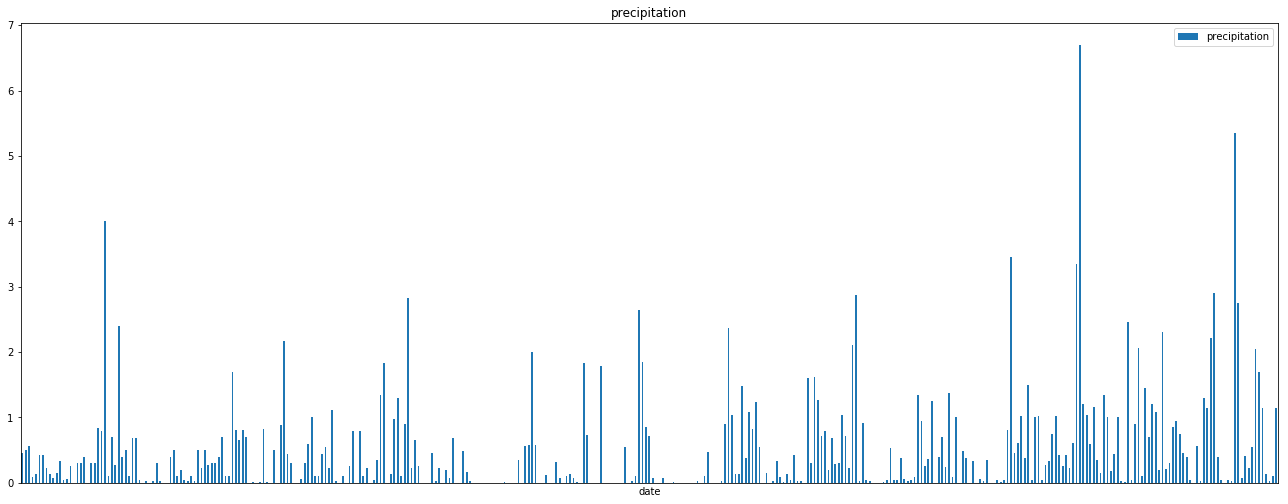

In [12]:
#plot precipitation data
pdf.plot.bar(subplots=True, figsize=(18,8))
plt.tight_layout()
plt.xticks([])
plt.show()

In [13]:
pdf.describe()

,precipitation
count,365.000000
mean,0.495562
std,0.775700
min,0.000000
25%,0.020000
50%,0.220000
75%,0.690000
max,6.700000


# Station Analysis

In [14]:
#Count number of stations
session.query(Stations.station_id).count()

9

In [15]:
#count number of observations per station
sta_obs = pd.DataFrame(session.query(Measurements.station, func.count(Measurements.tobs)).\
        group_by(Measurements.station).\
        order_by(func.count(Measurements.tobs).desc()).all(),
             columns=['station', 'observations #'])
sta_obs

,station,observations #
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484
5,USC00514830,1937
6,USC00511918,1932
7,USC00517948,683
8,USC00518838,342


In [16]:
#The station with the highest number of observations
sta_obs.max()

station           USC00519523
observations #           2772
dtype: object

# Temperature Analysis

In [17]:
#query temperature 'tobs' data
sta = pd.DataFrame(session.query(Measurements.station, Measurements.date, Measurements.tobs).\
    order_by(Measurements.id.desc()).limit(365).all(),
             columns=['station', 'date', 'tobs'])
sta.head()

,station,date,tobs
0,USC00516128,8/23/2017,76.0
1,USC00516128,8/22/2017,76.0
2,USC00516128,8/21/2017,76.0
3,USC00516128,8/19/2017,71.0
4,USC00516128,8/17/2017,72.0


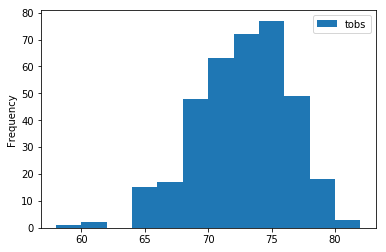

In [18]:
#create histogram
n_bins = 12
x = np.array(sta['tobs'])
plt.hist(x, n_bins, label='tobs')
plt.legend()
plt.ylabel('Frequency')
plt.show()

In [21]:
#get temp for several days
day1 = pd.DataFrame((session.query(Measurements.tobs).\
    filter(Measurements.date.like('3/5/2017%')).all()))
day2 = pd.DataFrame((session.query(Measurements.tobs).\
    filter(Measurements.date.like('3/6/2017%')).all()))
day3 =pd.DataFrame((session.query(Measurements.tobs).\
    filter(Measurements.date.like('3/7/2017%')).all()))
daytemp = [day1,day2,day3]
temp = pd.concat(daytemp)
temp

,tobs
0,71.0
1,70.0
2,73.0
3,68.0
0,69.0
1,66.0
2,67.0
3,76.0
0,68.0
1,65.0


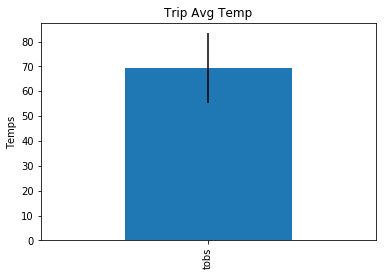

In [20]:
#create bar chart
means = temp.mean()
errors = temp.max()-temp.min()
fig, ax = plt.subplots()

ax.set_title('Trip Avg Temp')
plt.ylabel('Temps')
means.plot.bar(yerr=errors, ax=ax)